In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
# Cell 2: Load Cleaned Data
df = pd.read_csv("../data/cleaned_data.csv")
df.head()


,ID,Entity,Sentiment,Tweet,cleaned_tweet,text_length,word_count,has_hashtag,has_mention
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,29,4,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,19,3,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,27,4,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,28,4,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,29,4,0,0


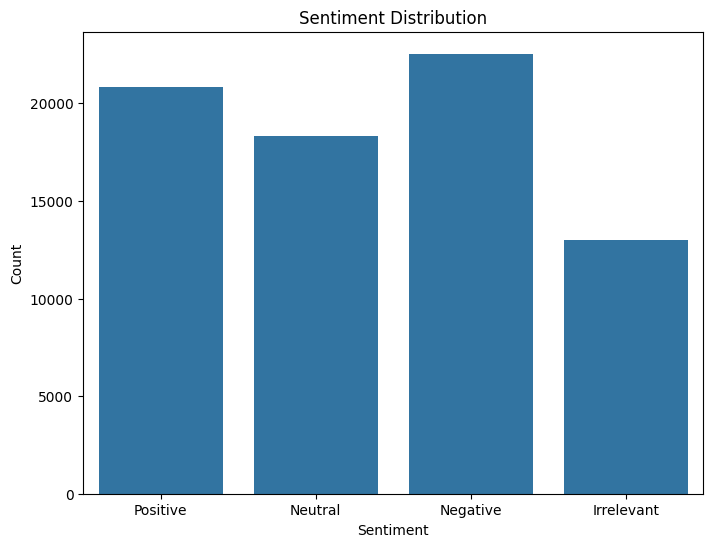

In [ ]:
#   Cell 3: Sentiment Distribution (This is the cell you mentioned)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("../outputs/visualizations/sentiment_distribution.png")
plt.show()

### Interpretation of Sentiment Distribution

The count plot shows the distribution of sentiment labels in the dataset. We observe that there is a significant class imbalance, with "Neutral" being the most frequent sentiment and "Irrelevant" being the least. This imbalance is important to consider when developing a sentiment analysis model, as it might require techniques like oversampling or undersampling to ensure the model performs well across all sentiment categories.

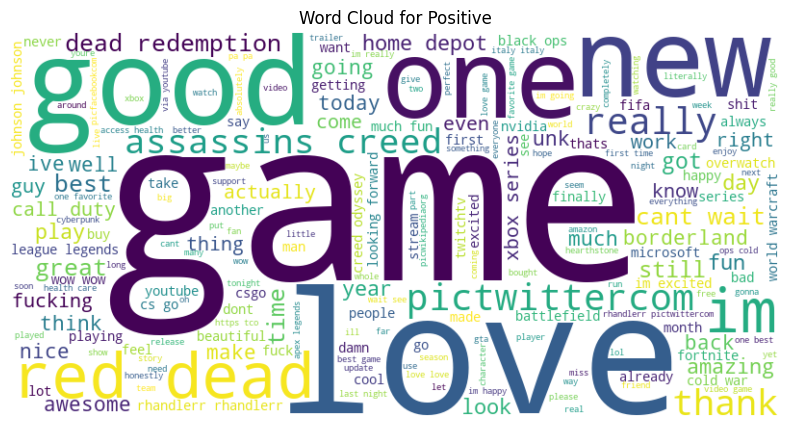

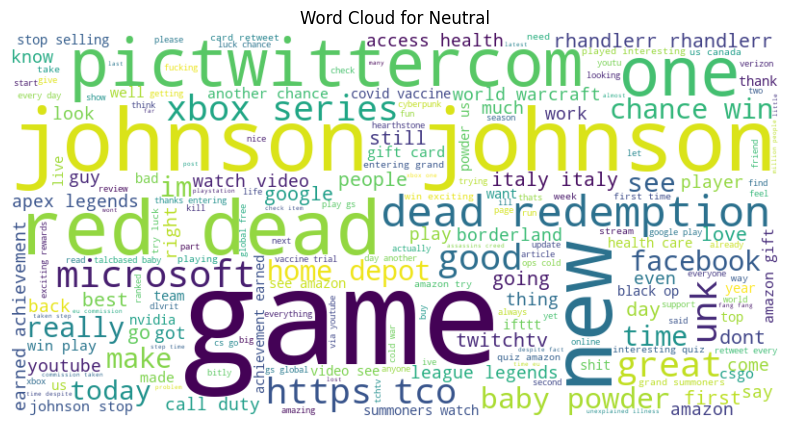

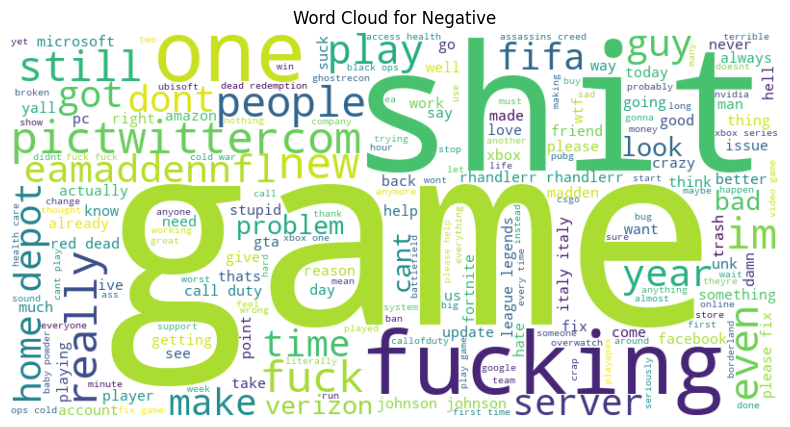

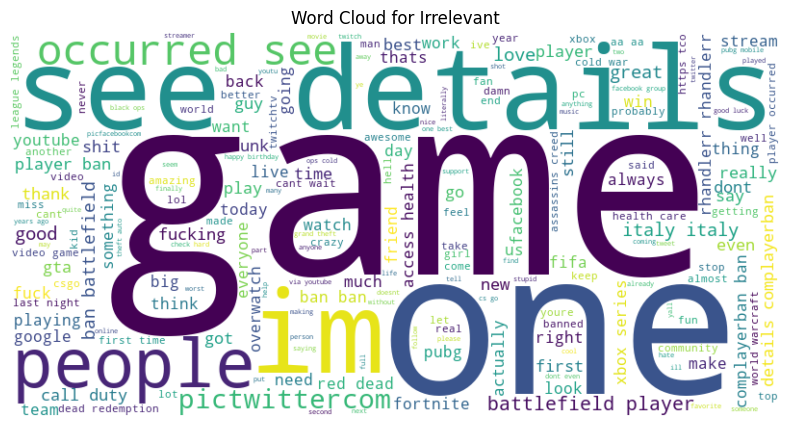

In [9]:
# Cell 4: Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in df["Sentiment"].unique():
    # Select and join all tweets for that sentiment
    text = " ".join(df[df["Sentiment"] == sentiment]["cleaned_tweet"].dropna().astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Show it
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment}")
    plt.savefig(f"../outputs/visualizations/wordcloud_{sentiment.lower()}.png")
    plt.show()


### Interpretation of Word Cloud

The word cloud visually represents the frequency of words in the cleaned tweets. Larger words indicate higher frequency. This gives us a quick overview of the most common themes and topics in the dataset. For example, if we see words like "game," "play," and "fun" prominently, it suggests that the tweets often discuss the experience of playing video games. This insight can be helpful for understanding the context of sentiment and for feature engineering in a sentiment analysis model.

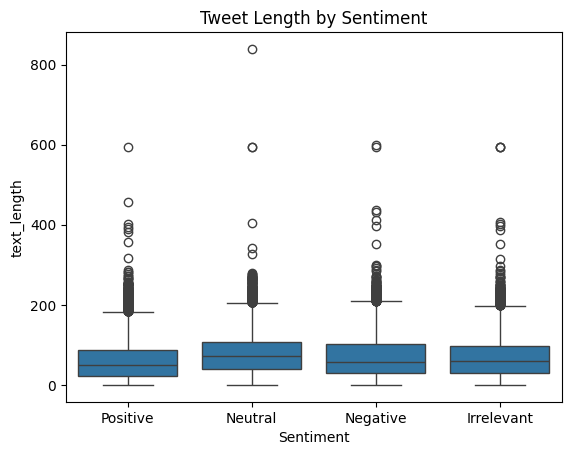

In [ ]:

# Cell 5: Boxplot of Text Length by Sentiment
sns.boxplot(x="Sentiment", y="text_length", data=df)
plt.title("Tweet Length by Sentiment")
plt.savefig("../outputs/visualizations/length_by_sentiment.png")
plt.show()

### Interpretation of Tweet Length by Sentiment

This boxplot visualizes the distribution of tweet lengths for each sentiment category. By comparing the boxes and whiskers, we can get an idea of whether the length of a tweet tends to vary based on its sentiment. For example, we can observe the median length, the spread (IQR), and any potential outliers in text length for positive, negative, neutral, and irrelevant tweets. This can help us understand if certain sentiments are typically expressed more concisely or in a more elaborate manner.

In [10]:
# Cell 6: Interactive Plot with Plotly
fig = px.histogram(df, x="Sentiment", color="Sentiment", title="Interactive Sentiment Distribution")
fig.write_image("../outputs/visualizations/interactive_sentiment_distribution.png")
fig.show()

### Interpretation of Interactive Sentiment Distribution

The interactive histogram provides the same information as the previous count plot but allows for more exploration. Users can hover over bars to see exact counts, zoom in on specific sections, and filter by sentiment. This interactivity enhances our understanding of the distribution and makes it easier to analyze specific sentiment categories.

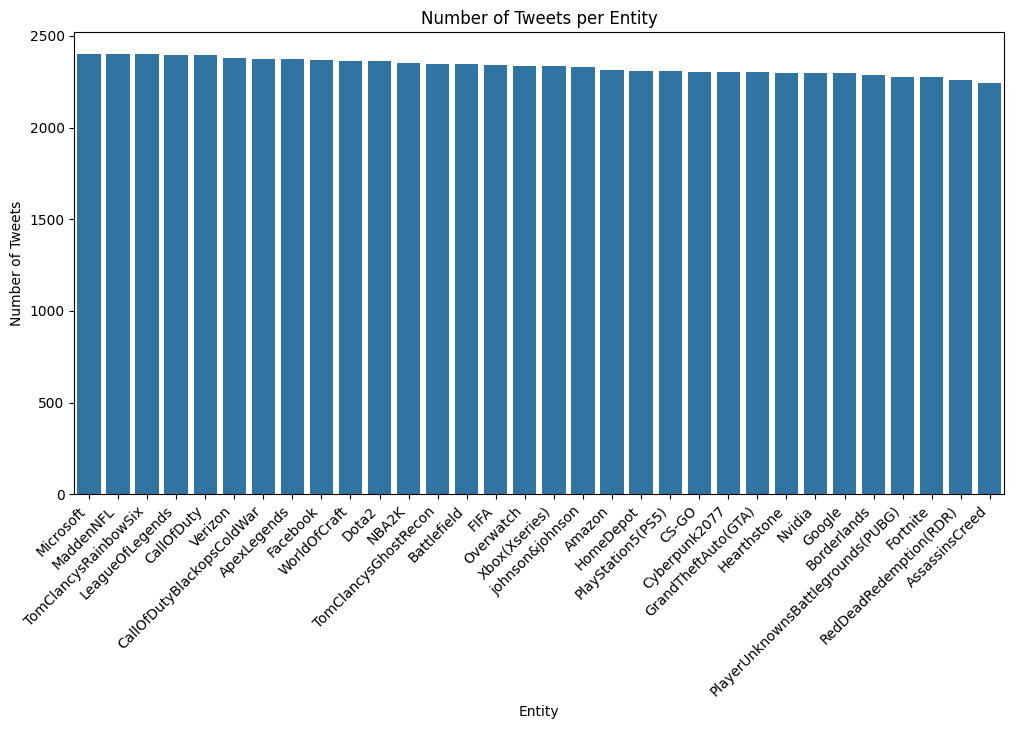

In [11]:
# Cell 7: Bar chart for tweet counts per entity
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Entity', order=df['Entity'].value_counts().index)
plt.title('Number of Tweets per Entity')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.savefig("../outputs/visualizations/entity_tweet_counts.png")
plt.show()

### Interpretation of Tweets per Entity

This bar chart shows the number of tweets for each entity. It helps us understand which entities are discussed more frequently in the dataset. This information can be valuable for analyzing sentiment trends for specific entities and identifying potential biases in the data. For example, if one entity has significantly more tweets than others, it might have a disproportionate influence on the overall sentiment analysis results.